In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [203]:
df=pd.read_csv("Loan_Prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [204]:
df.shape

(614, 13)

Here we have,614 rows and 13 columns

In [205]:
df["Dependents"]

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

In [206]:
df['Dependents']=df.Dependents.str.extract('(\d+)')

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [208]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Statistical Summary

In [209]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


As we can see from the Statistical summary that outliers and skewness are present in the data set, we will check it in further step

In [210]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

So, as we can see that null values are present in the data set.

<AxesSubplot:>

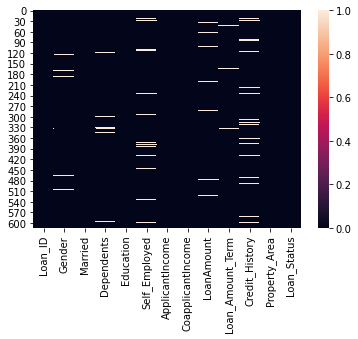

In [211]:
sns.heatmap(df.isnull())

# Filling Missing Values

In [212]:
df["Dependents"]=df["Dependents"].fillna(method="ffill")
df["Gender"]=df["Gender"].fillna(method="bfill")
df["Married"]=df["Married"].fillna(method="ffill")
df["Self_Employed"]=df["Self_Employed"].fillna(method="ffill")
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mean())
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(method="ffill")
df["Credit_History"]=df["Credit_History"].fillna(method="ffill")

<AxesSubplot:>

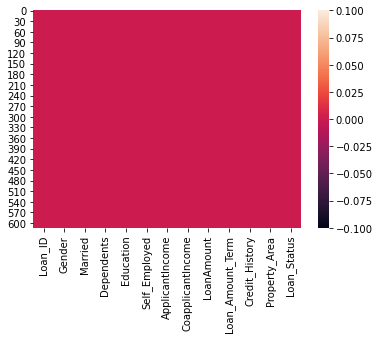

In [213]:
sns.heatmap(df.isnull())

In [214]:
df.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [215]:
df[["LoanAmount","Loan_Status"]][:10]

,LoanAmount,Loan_Status
0,146.412162,Y
1,128.000000,N
2,66.000000,Y
3,120.000000,Y
4,141.000000,Y
5,267.000000,Y
6,95.000000,Y
7,158.000000,N
8,168.000000,Y
9,349.000000,N


<AxesSubplot:>

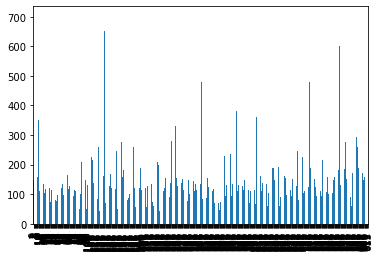

In [216]:
df["LoanAmount"].plot.bar()

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

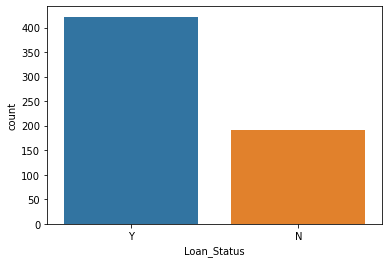

In [217]:
sns.countplot("Loan_Status",data=df)

As per the above visualization, data is not imbalance

# Bi-Variate Analysis

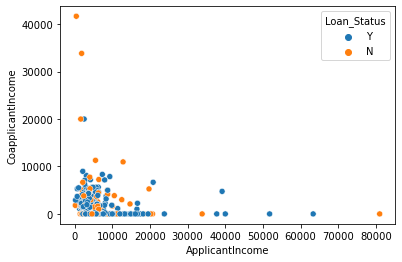

In [218]:
sns.scatterplot(x="ApplicantIncome",y="CoapplicantIncome",data=df,hue="Loan_Status")
plt.show()

As per the above visualization, applications income has more chances to get loan approval rather than coapplication income

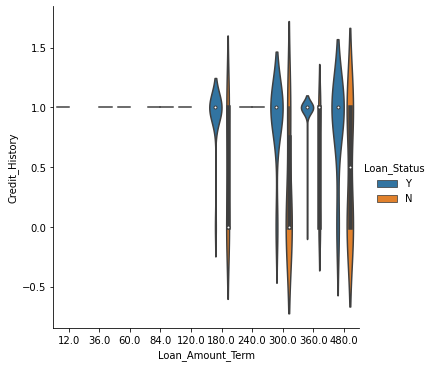

In [219]:
sns.catplot(x="Loan_Amount_Term",y="Credit_History",data=df,kind="violin",hue="Loan_Status")

from above plot, Credit History is more valuable in terms of getting loan

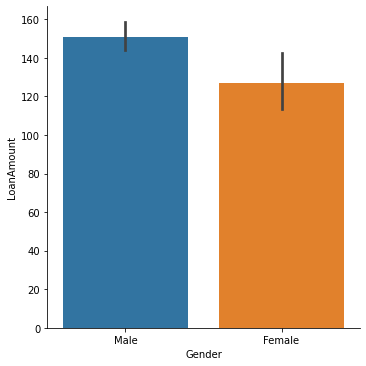

In [220]:
sns.catplot(x="Gender",y="LoanAmount",data=df,kind="bar")

As per the above plot, Male has geting more loan in compare to Female

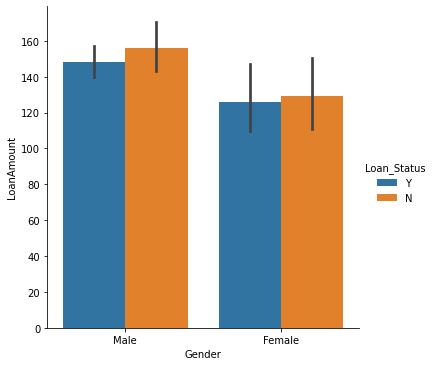

In [221]:
sns.catplot(x="Gender",y="LoanAmount",data=df,kind="bar",hue="Loan_Status")

as both the gender has equal loan_status, so it does not depend to give loan to a specific gender

In [222]:
df['Gender'].value_counts()

Male      501
Female    113
Name: Gender, dtype: int64

In [223]:
df[["Gender","Loan_Status"]][:15]

,Gender,Loan_Status
0,Male,Y
1,Male,N
2,Male,Y
3,Male,Y
4,Male,Y
5,Male,Y
6,Male,Y
7,Male,N
8,Male,Y
9,Male,N


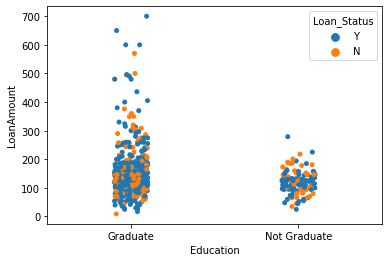

In [224]:
sns.stripplot(x="Education",y="LoanAmount",data=df,hue="Loan_Status")
plt.show()

We can see from the above plot, that the loan amount is given more to Graduate rather than non-graduate

# Data Preprocessing

In [225]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=["Gender","Married","Education","Self_Employed","Self_Employed","Property_Area","Loan_Status"]
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [226]:
df.drop("Loan_ID",axis=1,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


As Loan_Id is not required in the data frame, it would not effect the data set more

# EDA

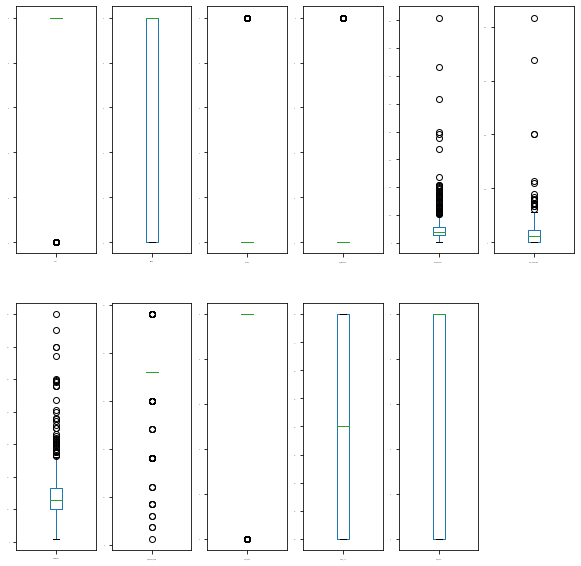

In [227]:
df.plot(kind="box",subplots=True,layout=(2,6),sharex=False,legend=False,fontsize=1,figsize=(10,10))
plt.show()

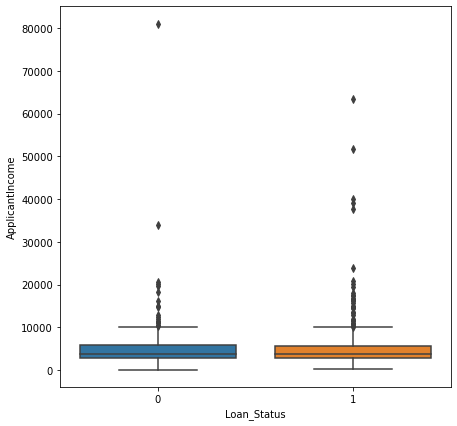

In [228]:
plt.figure(figsize=(7, 7))
_= sns.boxplot(data=df, x='Loan_Status', y='ApplicantIncome')

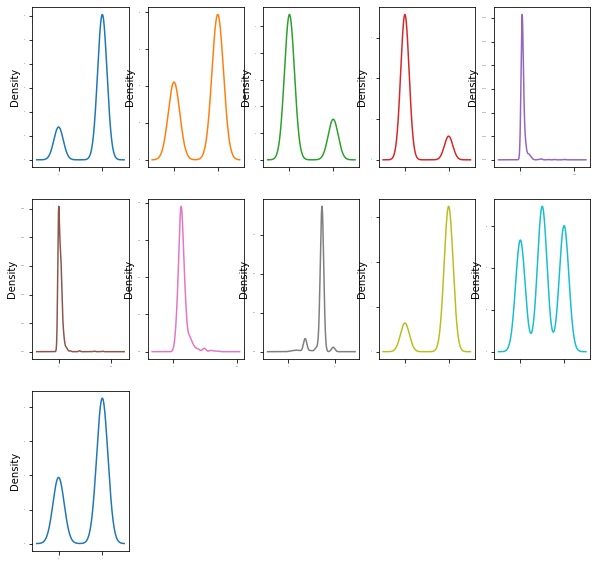

In [229]:
df.plot(kind="density",subplots=True,layout=(3,5),sharex=False,legend=False,fontsize=1,figsize=(10,10))
plt.show()

In [230]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [231]:
x.skew()

Gender              -1.634695
Married             -0.637293
Dependents           0.976422
Education            1.367622
Self_Employed        2.079309
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.293829
Credit_History      -1.814433
Property_Area       -0.066196
dtype: float64

# Data Cleansing

In [232]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
#Removing Outliers using IQR method
df_new=df[~((df < (Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]

In [233]:
df_new.shape

(211, 12)

In [234]:
df.shape

(614, 12)

In [235]:
loss_percentage=(614-211)/614*100
print(loss_percentage)

65.63517915309446


In [236]:
df.skew()

Gender              -1.634695
Married             -0.637293
Dependents           0.976422
Education            1.367622
Self_Employed        2.079309
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.293829
Credit_History      -1.814433
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [237]:
from sklearn.preprocessing import power_transform
df1=power_transform(x)
df1=pd.DataFrame(df1,columns=x.columns)

In [247]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df1=sc.fit_transform(df1)
df1

array([[ 0.47491989, -1.36717185, -0.84244356, ...,  0.18201898,
         0.44371285,  1.1935668 ],
       [ 0.47491989,  0.73143694,  0.81570361, ...,  0.18201898,
         0.44371285, -1.35000343],
       [ 0.47491989,  0.73143694, -0.84244356, ...,  0.18201898,
         0.44371285,  1.1935668 ],
       ...,
       [ 0.47491989,  0.73143694,  0.81570361, ...,  0.18201898,
         0.44371285,  1.1935668 ],
       [ 0.47491989,  0.73143694,  1.29588338, ...,  0.18201898,
         0.44371285,  1.1935668 ],
       [-2.10561827, -1.36717185, -0.84244356, ...,  0.18201898,
        -2.25370981,  0.00236103]])

# Finding The Best Random State

In [248]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
maxAucc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    le=LogisticRegression()
    le.fit(x_train,y_train)
    pred=le.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAucc:
        maxAucc=acc
        maxRS=i
print("Best Accuracy is ",maxAucc,"on random_state",maxRS)

Best Accuracy is  0.8594594594594595 on random_state 8


# Creating Train Test Split

In [249]:
x_train,y_train,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=8)

In [250]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(accuracy_score(y_test,pred))

0.6594594594594595


In [251]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print(accuracy_score(y_test,pred))

0.572972972972973


In [252]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(accuracy_score(y_test,pred))

0.5891891891891892


In [254]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
print(accuracy_score(y_test,pred))

0.6108108108108108


In [256]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print(accuracy_score(y_test,pred))

0.7027027027027027


In [257]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
print(accuracy_score(y_test,pred))

0.6432432432432432


In [258]:
from sklearn.model_selection import cross_val_score

In [259]:
scr=cross_val_score(lr,x,y,cv=5)
print("Cross validation Score of Logistic Regression",scr.mean()

Cross validation Score of Logistic Regression 0.8045715047314406


In [260]:
scr=cross_val_score(dtc,x,y,cv=5)
print("Cross validation Score of Decision Tree Classifier",scr.mean())

Cross validation Score of Decision Tree Classifier 0.6856723977075836


In [261]:
scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation Score of Radndom Forest Classifier",scr.mean())

Cross validation Score of Radndom Forest Classifier 0.7801679328268692


In [262]:
scr=cross_val_score(kn,x,y,cv=5)
print("Cross validation Score of KNeighbors  Classifier",scr.mean())

Cross validation Score of KNeighbors  Classifier 0.6156337465013995


In [263]:
scr=cross_val_score(svc,x,y,cv=5)
print("Cross validation Score of Support Vector  Classifier",scr.mean())

Cross validation Score of Support Vector  Classifier 0.6872984139677463


In [264]:
scr=cross_val_score(ad,x,y,cv=5)
print("Cross validation Score of AdaBoost  Classifier",scr.mean())

Cross validation Score of AdaBoost  Classifier 0.7866453418632547


So the least difference is in KNeighbors Classifier, will do Hyper tuning with KNeighbors

# Hyper Tuning With KNeighbors Classifier

In [265]:
from sklearn.model_selection import GridSearchCV

In [266]:
parameters={"n_neighbors":np.arange(2,15),
           "weights":["uniform", "distance"],
           "algorithm":["auto","ball_tree","kd_tree","brute"]}
GCV=GridSearchCV(KNeighborsClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'algorithm': 'auto', 'n_neighbors': 13, 'weights': 'uniform'}

In [267]:
kn_mod=KNeighborsClassifier(algorithm="auto",n_neighbors=13,weights="uniform")

kn_mod.fit(x_train,y_train)
pred=kn_mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

62.16216216216216
              precision    recall  f1-score   support

           0       0.09      0.04      0.05        52
           1       0.69      0.85      0.76       133

    accuracy                           0.62       185
   macro avg       0.39      0.44      0.41       185
weighted avg       0.52      0.62      0.56       185

[[  2  50]
 [ 20 113]]


# Plotting AUC and ROC Curve

In [268]:
from sklearn.metrics import plot_roc_curve

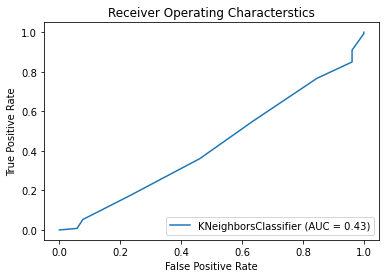

In [269]:
plot_roc_curve(kn_mod,x_test,y_test)
plt.title("Receiver Operating Characterstics")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()